# Visualizing Thanks Usage

In [1]:
library(tidyverse)
library(broom)

# library(brms) # install.packages("brms")
# library(loo) # install.packages("loo")
# library(rstanarm) # install.packages("rstanarm")

library(lubridate)

library(caret)

library(lme4)

library(here)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


here() starts at /srv/home/nettrom/src/2022-Growth-positive-reinforcement



In [7]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [25]:
thanks_data <- read_tsv(here('datasets', 'thanks-data-3months.tsv')) %>%
    mutate(prop_thanks = num_thanks / num_edits,
           mean_thanks_7 = rollmean(prop_thanks, 7, na.pad = TRUE),
           mean_thanks_14 = rollmean(prop_thanks, 14, na.pad = TRUE),
           mean_thanks_28 = rollmean(prop_thanks, 28, na.pad = TRUE),
           rev_month = year(rev_day) * 100 + month(rev_day)
           )

Rows: 720 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): wiki_db
dbl  (2): num_edits, num_thanks
date (1): rev_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [72]:
thanks_all_namespaces <- read_tsv(here('datasets', 'thanks-data-3months-all-namespaces.tsv')) %>%
    mutate(prop_thanks = num_thanks / num_edits,
           mean_thanks_7 = rollmean(prop_thanks, 7, na.pad = TRUE),
           mean_thanks_14 = rollmean(prop_thanks, 14, na.pad = TRUE),
           mean_thanks_28 = rollmean(prop_thanks, 28, na.pad = TRUE),
           rev_month = year(rev_day) * 100 + month(rev_day)
           )

Rows: 720 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): wiki_db
dbl  (2): num_edits, num_thanks
date (1): rev_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [76]:
thanks_by_tenure <- read_tsv(here('datasets', 'thanks-data-3months-by-tenure.tsv')) %>%
    mutate(prop_thanks = num_thanks / num_edits,
           mean_thanks_7 = rollmean(prop_thanks, 7, na.pad = TRUE),
           mean_thanks_14 = rollmean(prop_thanks, 14, na.pad = TRUE),
           mean_thanks_28 = rollmean(prop_thanks, 28, na.pad = TRUE),
           rev_month = year(rev_day) * 100 + month(rev_day)
           )

Rows: 2160 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): wiki_db, user_tenure
dbl  (2): num_edits, num_thanks
date (1): rev_day

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Calculate monthly averages

In [40]:
agg_by_month <- thanks_data %>%
    group_by(wiki_db, rev_month) %>%
    summarize(mean_thanks = mean(prop_thanks), .groups = 'keep')

In [42]:
# Give me wider plots, please
options(repr.plot.width = 14, repr.plot.height = 7)

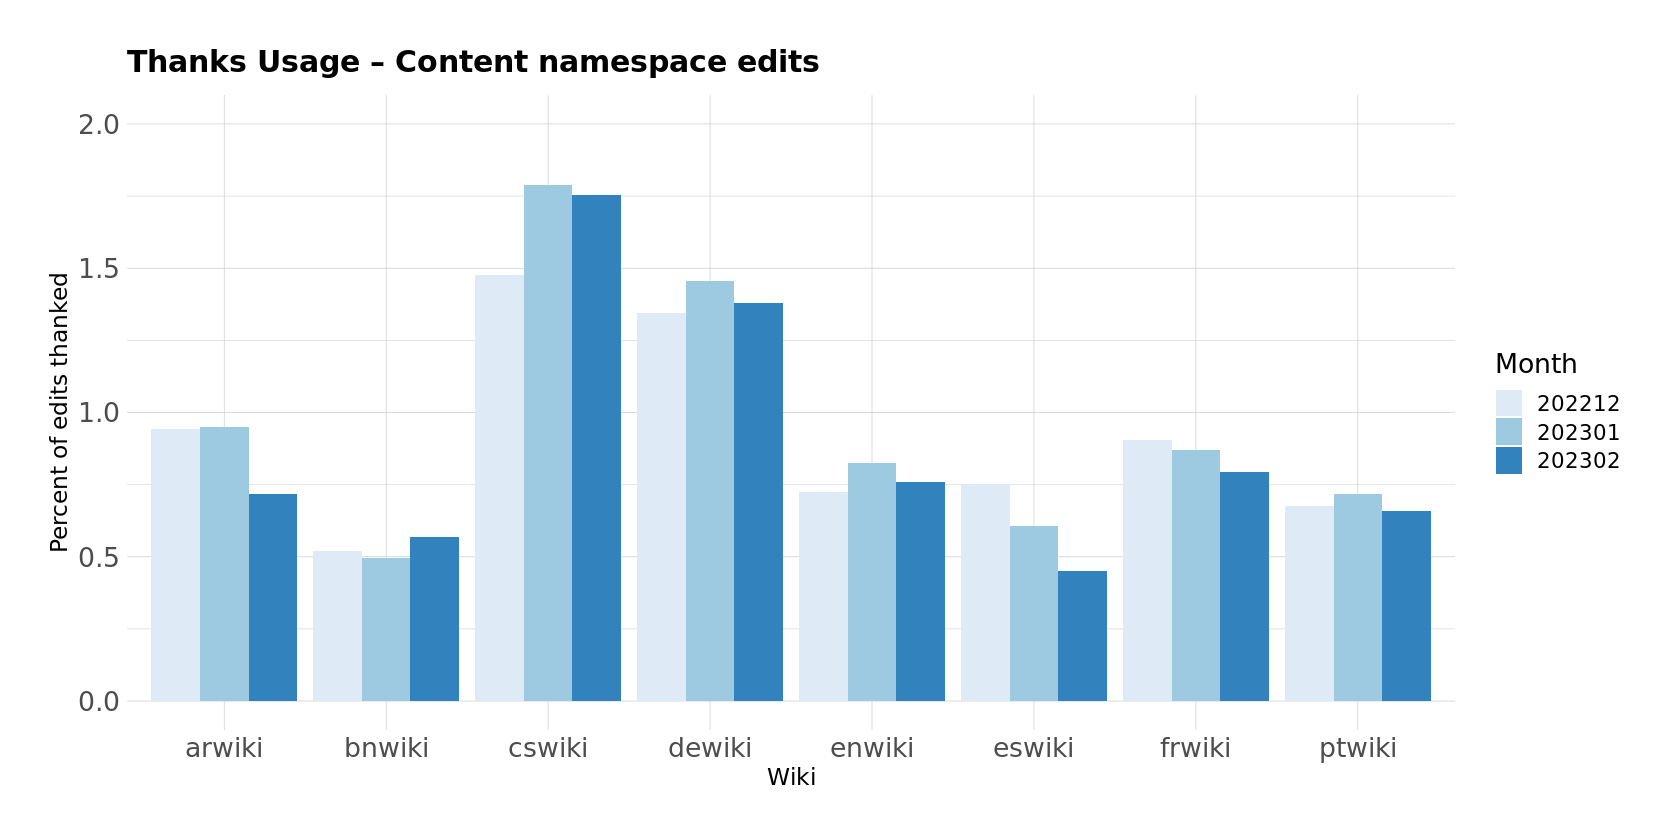

In [69]:
ggplot(agg_by_month, aes(x = wiki_db, y = 100 * mean_thanks,
                         fill = factor(rev_month))) +
    labs(title = 'Thanks Usage – Content namespace edits',
             x = 'Wiki',
             y = 'Percent of edits thanked',
             fill = 'Month') +
        hrbrthemes::theme_ipsum("DejaVu Sans", base_size = 16, strip_text_face = "bold", strip_text_size = 18,
                            caption_size = 12, axis_title_size = 14, subtitle_size = 14,
                            axis_title_just = 'cm') +
        scale_fill_brewer() +
        scale_y_continuous(limits = c(0, 2)) +
        geom_col(position = 'dodge')

In [70]:
ggsave(
    here('graphs', '3-month-thanks-usage.png'),
    width = 9, height = 6, units = "in", dpi = "retina", bg = 'white')

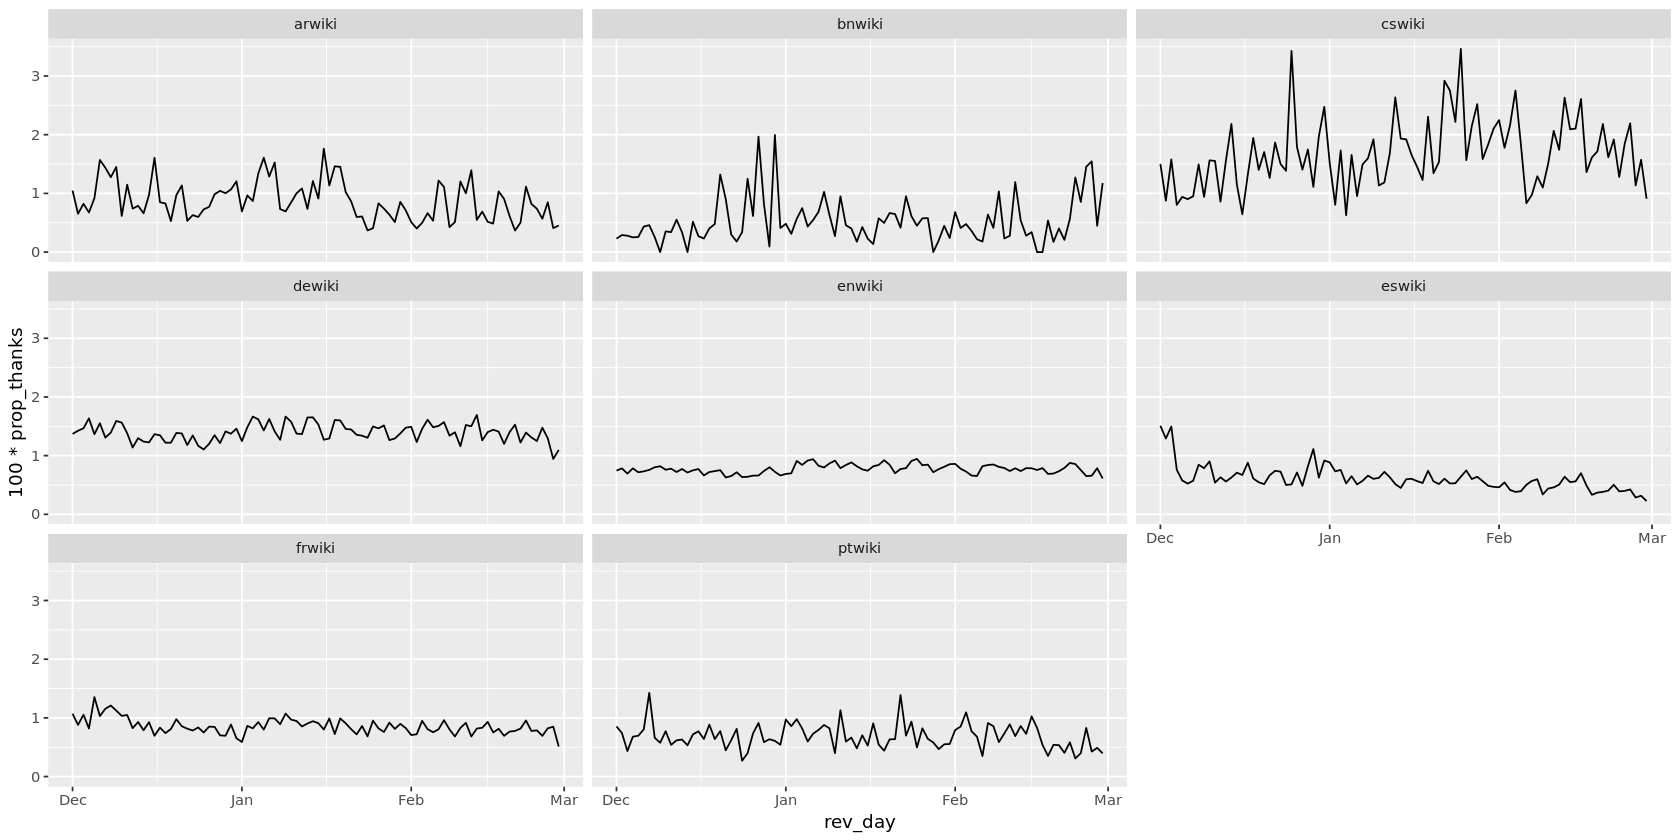

In [71]:
ggplot(thanks_data, aes(x = rev_day, y = 100 * prop_thanks)) +
    geom_line() +
    facet_wrap(vars(wiki_db))

In [73]:
agg_by_month_all_namespaces <- thanks_all_namespaces %>%
    group_by(wiki_db, rev_month) %>%
    summarize(mean_thanks = mean(prop_thanks), .groups = 'keep')

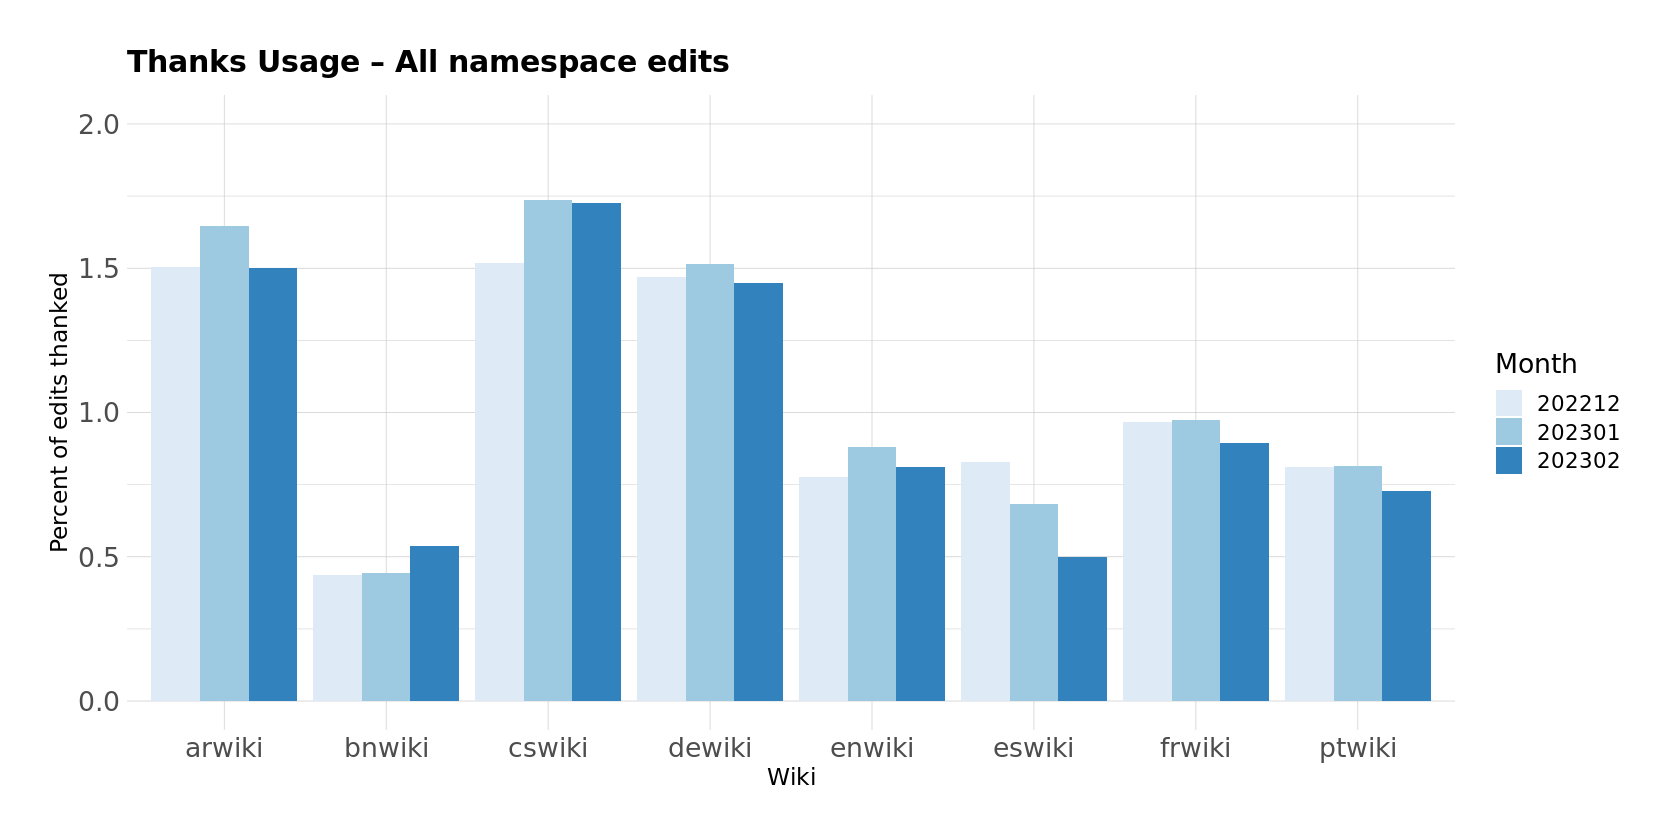

In [74]:
ggplot(agg_by_month_all_namespaces, aes(x = wiki_db, y = 100 * mean_thanks,
                         fill = factor(rev_month))) +
    labs(title = 'Thanks Usage – All namespace edits',
             x = 'Wiki',
             y = 'Percent of edits thanked',
             fill = 'Month') +
        hrbrthemes::theme_ipsum("DejaVu Sans", base_size = 16, strip_text_face = "bold", strip_text_size = 18,
                            caption_size = 12, axis_title_size = 14, subtitle_size = 14,
                            axis_title_just = 'cm') +
        scale_fill_brewer() +
        scale_y_continuous(limits = c(0, 2)) +
        geom_col(position = 'dodge')

In [75]:
ggsave(
    here('graphs', '3-month-thanks-usage-all-namespaces.png'),
    width = 9, height = 6, units = "in", dpi = "retina", bg = 'white')

## By Tenure

In [96]:
agg_by_tenure <- thanks_by_tenure %>%
    group_by(wiki_db, user_tenure) %>%
    summarize(mean_thanks = mean(prop_thanks), .groups = 'keep') %>%
    mutate(user_tenure = ordered(user_tenure,
                                 c('Less than 30 days', 'Less than 1 year', 'More than 1 year')))

In [95]:
thanks_by_tenure %>%
    filter(wiki_db == 'arwiki' & user_tenure == 'Less than 30 days') %>%
    group_by(rev_month) %>%
    summarize(mean_thanks = mean(prop_thanks))

rev_month,mean_thanks
<dbl>,<dbl>
202212,0.008406566
202301,0.008167931
202302,0.008397686


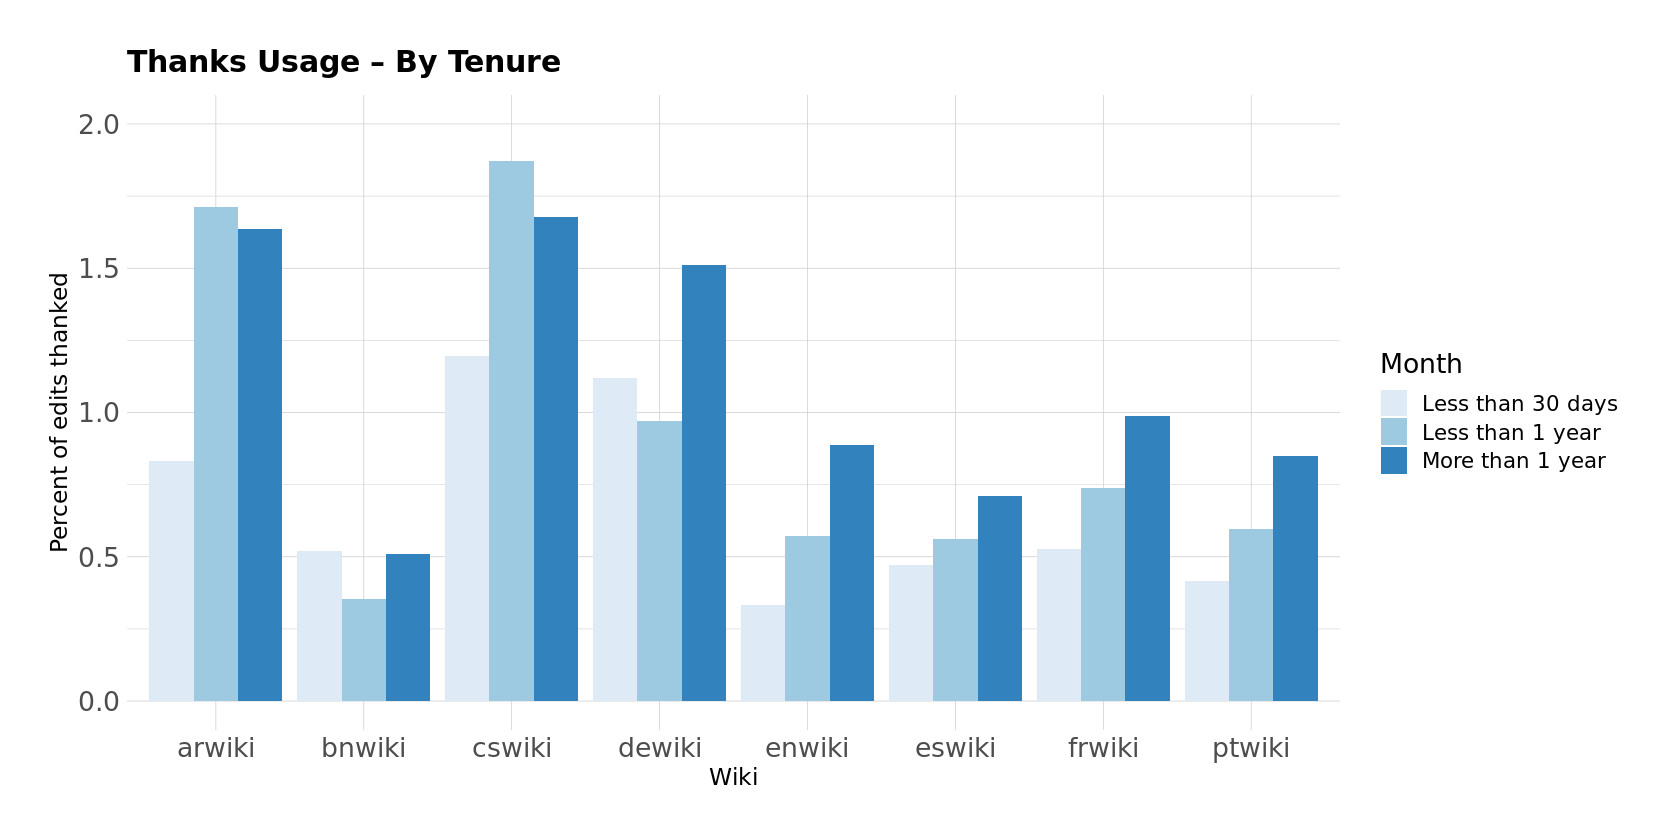

In [97]:
ggplot(agg_by_tenure, aes(x = wiki_db, y = 100 * mean_thanks,
                         fill = user_tenure)) +
    labs(title = 'Thanks Usage – By Tenure',
             x = 'Wiki',
             y = 'Percent of edits thanked',
             fill = 'Month') +
        hrbrthemes::theme_ipsum("DejaVu Sans", base_size = 16, strip_text_face = "bold", strip_text_size = 18,
                            caption_size = 12, axis_title_size = 14, subtitle_size = 14,
                            axis_title_just = 'cm') +
        scale_fill_brewer() +
        scale_y_continuous(limits = c(0, 2)) +
        geom_col(position = 'dodge')

In [99]:
ggsave(
    here('graphs', '3-month-thanks-usage-by-tenure.png'),
    width = 12, height = 6, units = "in", dpi = "retina", bg = 'white')